<a href="https://colab.research.google.com/github/hiroML/test/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

The 1-D logistic regression problem may be stated as:

> Given a set of data $(x_n, t_n)$ for $n = 1$ to $N$, where $t_n=f(x_n)$ is either __true__ or __false__, find the function $f$.

It can be regarded as a binary classification problem, where we can define the classifier function $f(x)$ that returns __true__ if the posterior probability $p(\mathrm{true}\, |\, x) > 0.5$:

$$
\begin{eqnarray}
f(x) &=& \mathrm{true} \ \ \mathrm{if} \ \  p(\mathrm{true}\, |\, x) \,>\, \gamma \nonumber \\
f(x) &=& \mathrm{false} \ \ \mathrm{if} \ \ p(\mathrm{false}\, |\, x) \,\ge\, \gamma, \nonumber
\end{eqnarray}
$$

where $\gamma$ is a threshold value. Now, the poterior distribution $p$ is of our interest. Because this is a binary classification problem, by letting $p(\mathrm{true}\,|\,x)=g(x)$ we have

$$
\begin{eqnarray}
p(\mathrm{true}\,|\,x) &=& g(x) \nonumber \\
p(\mathrm{false}\,|\,x) &=& 1 - g(x). \nonumber
\end{eqnarray}
$$

The maximum likelihood method is a suitable choice to find the function $g(x)$. Letting $t_n=1$ for __true__ and $t_n=0$ for __false__ samples, $p$ becomes the Bernoulli distribution and we have the likelihood function:

$$
\begin{eqnarray}
L &=& \displaystyle\prod_{n=1}^{N}p(\mathrm{true}\,|\,x_n)^{t_n} \, p(\mathrm{false}\,|\,x_n)^{1-t_n} \nonumber \\
&=& \displaystyle\prod_{n=1}^N g(x_n)^{t_n} (1-g(x_n))^{1-t_n}. \nonumber
\end{eqnarray}
$$

Taking the logarighm of both sides, we have

$$
\begin{eqnarray}
\ln L &=& \ln \displaystyle\prod_{n=1}^N g(x_n)^{t_n} (1-g(x_n))^{1-t_n} \nonumber \\
&=& \displaystyle\sum_{n=0}^N t_n \ln g(x_n) + \displaystyle\sum_{n=0}^N (1-t_n) \ln (1-g(x_n)) \nonumber
\end{eqnarray}
$$

Similar to the regression problem, let's model the function $g$ with polinomials:

$$
g(x) = a(w_0 + w_1 x + w_2 x^2 + \cdots) = a(\mathbf{x}^T \mathbf{w}).
$$

where $\mathbf{x}=[1,x,x^2,\cdots]^T$, $\mathbf{w}=[w_0,w_1,w_2,\cdots]^T$, and a function $a(\cdot)$ confines the output value within $0$ and $1$, such as the __sigmoid__ function. In general, $g(x)$ would be modeled by __neural network__.

The unknown parameter $\mathbf{w}$ can be estimated by maximizing the log likelihood function:

$$
\ln L(\mathbf{w}) = \displaystyle\sum_{n=0}^N t_n \ln a(\mathbf{x}_n^T \mathbf{w}) + \displaystyle\sum_{n=0}^N (1-t_n) \ln (1-a(\mathbf{x}_n^T \mathbf{w}))
$$

The gradient descent method would be a simple choice to find the parameter $\mathbf{w}$ because of the logistic function $a(\cdot)$. In order to use the gradient descent method, we take the gradient of the log likelihood:

$$
\begin{eqnarray}
\color{orange}{\displaystyle\frac{\partial}{\partial\mathbf{w}} \ln L(\mathbf{w})} &=& \displaystyle\sum_{n=0}^N t_n \color{#0033CC}{\displaystyle\frac{\partial}{\partial\mathbf{w}} \ln a(\mathbf{x}_n^T \mathbf{w})} \color{black}{+ \displaystyle\sum_{n=0}^N (1-t_n)} \color{#02B02B}{\displaystyle\frac{\partial}{\partial\mathbf{w}} \ln (1-a(\mathbf{x}_n^T \mathbf{w}))} \nonumber \\
&=& \displaystyle\sum_{n=1}^N (t_n - a(\mathbf{x}_n^T \mathbf{w}))\, \mathbf{x}_n, \nonumber
\end{eqnarray}
$$

where $a(\cdot)=\mathrm{sigmoid}(\cdot)$,

$$
\color{#0033CC}{
\displaystyle\frac{\partial}{\partial \mathbf{w}} \ln a(\mathbf{x}_n^T \mathbf{w}) = \displaystyle\frac{\frac{\partial}{\partial \mathbf{w}} a(\mathbf{x}_n^T \mathbf{w})}{a(\mathbf{x}_n^T \mathbf{w})} = \displaystyle\frac{a(\mathbf{x}_n^T \mathbf{w}) (1 - a(\mathbf{x}_n^T \mathbf{w})) \mathbf{x}_n}{a(\mathbf{x}_n^T \mathbf{w})} = (1 - a(\mathbf{x}_n^T \mathbf{w})) \mathbf{x}_n},
$$

and

$$
\color{#02B02B}{
\displaystyle\frac{\partial}{\partial\mathbf{w}} \ln (1-a(\mathbf{x}_n^T \mathbf{w})) = \displaystyle\frac{\frac{\partial}{\partial \mathbf{w}} (1 - a(\mathbf{x}_n^T \mathbf{w}))}{1 -a(\mathbf{x}_n^T \mathbf{w})} = -a(\mathbf{x}_n^T \mathbf{w}) \mathbf{x}_n}.
$$

The gradient descent method yields an solution by iteratively update the parameter:

$$
\mathbf{w}^{(\ell+1)} = \mathbf{w}^{(\ell)} + \lambda \color{orange}{\displaystyle\frac{\partial}{\partial \mathbf{w}} \ln L(\mathbf{w})}.
$$



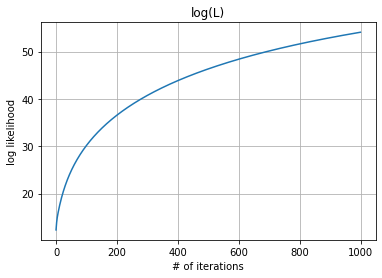

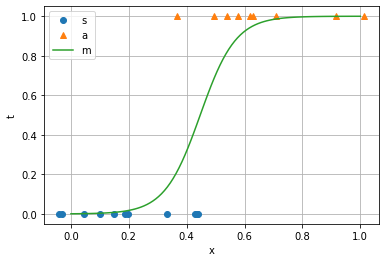

In [52]:
import numpy
import pylab

def sigmoid(x):
  return 1.0 / (1.0 + numpy.exp(-x))

def polynomials(x, order):
  X = numpy.zeros(order+1)
  for i in range(order+1):
    X[i] = x**i
  return X # = [1, x, x^2, x^3, ...] 

def grad(x, t, w, order):
  d = numpy.zeros(w.size)
  loss = 0
  for n in range(xn.size):
    # polynomials
    Xn = polynomials(x[n], order)
    # compute the difference
    g = sigmoid(numpy.sum(Xn * w))
    e = t[n] - g
    # add up the gradient from each sample
    d += e * Xn
    # total loss
    loss += t[n] * numpy.log(g) + (1 - t[n]) * (1 - numpy.log(g))
  return d, loss

def train(x, t, order, step, IT):
  w = numpy.ones(order+1)
  loss = numpy.zeros(IT)
  for i in range(IT):
    # compute the gradient of the log likelihood
    g, l = grad(x, t, w, order)
    # update
    w += step * g
    # loss history
    loss[i] = l
  return w, loss

numpy.random.seed(3)
x = numpy.random.random(20)
t = numpy.zeros(x.size)
t[x>0.5] = 1.0

x += numpy.random.randn(x.size) * 0.08

order = 1
step = 0.1
IT = 1000
w, loss = train(x, t, order, step, IT)

pylab.plot(numpy.arange(IT), loss)
pylab.title('log(L)')
pylab.xlabel('# of iterations')
pylab.ylabel('log likelihood')
pylab.grid()
pylab.show()

xx = numpy.linspace(0, 1, 100)
gx = numpy.zeros(xx.size)
for n in range(xx.size):
  Xn = polynomials(xx[n], order)
  gx[n] = sigmoid(numpy.sum(Xn * w))

pylab.plot(x[t==0], t[t==0], 'o')
pylab.plot(x[t==1], t[t==1], '^')
pylab.plot(xx, gx)
pylab.xlabel('x')
pylab.ylabel('t')
pylab.legend('samples with false label')
pylab.grid()
pylab.show()
